<a href="https://colab.research.google.com/github/ritu-yadav/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project detail :

(284807, 31)
<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462

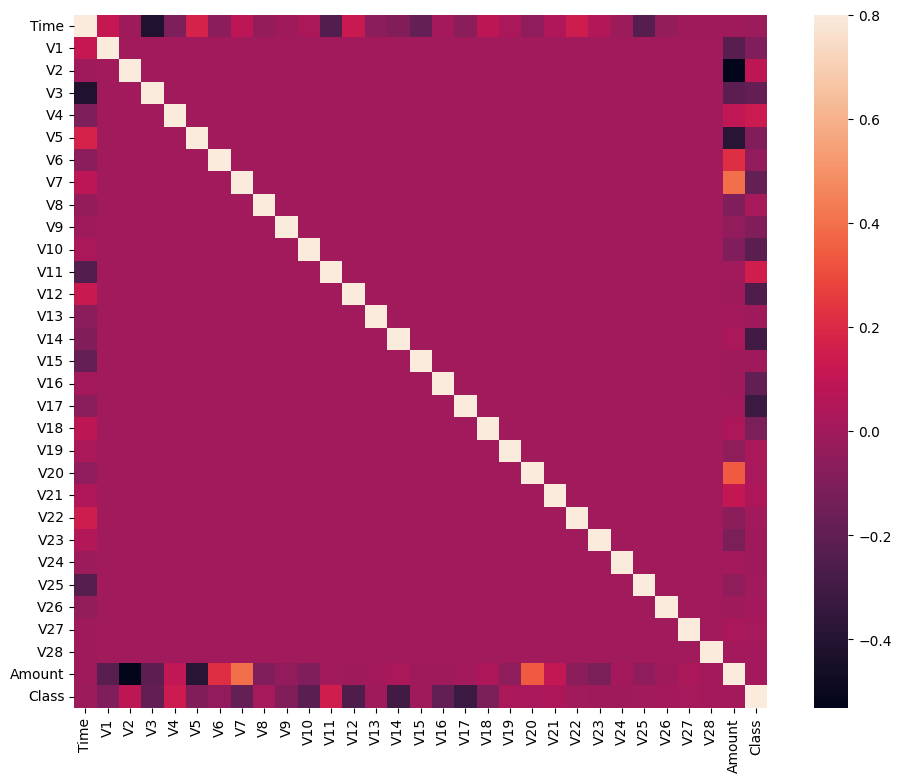

(284807, 30)
(284807,)
The model used is Random Forest classifier
The accuracy is 0.9995786664794073
The precision is 0.9625
The recall is 0.7857142857142857
The F1-Score is 0.8651685393258427
The Matthrews correlation coefficient is 0.8694303688259544


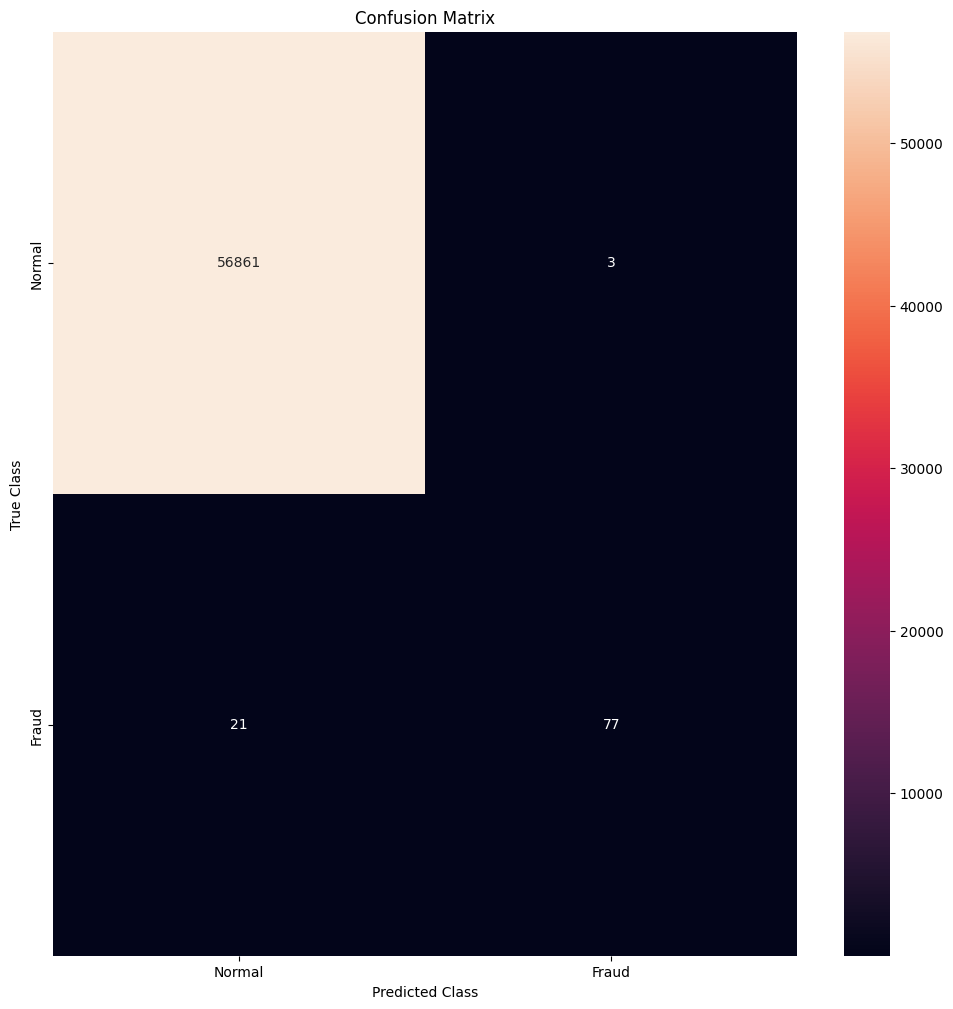

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

data = pd.read_csv('creditcard.csv')
data.head()
print(data.shape)
print(data.describe)

fraud =data[data['Class'] == 1 ]
valid =data[data['Class'] == 0 ]
outlinerFraction =len(fraud)/float(len(valid))
print(outlinerFraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

print("Amount details of the fraudulen tranction")
fraud.Amount.describe()

print("Detail for normal transaction")
valid.Amount.describe()

corrmat =data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

X=data.drop('Class',axis=1)
Y=data["Class"]
print(X.shape)
print(Y.shape)
xData=X.values
yData=Y.values

from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(xData,yData,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred =rfc.predict(xTest)

from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliners = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc= accuracy_score(yTest,yPred)
print("The accuracy is {}".format(acc))

prec =precision_score(yTest,yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest,yPred)
print("The recall is {}".format(rec))

f1= f1_score(yTest,yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest,yPred)
print("The Matthrews correlation coefficient is {}".format(MCC))

LABELS = ['Normal','Fraud']
conf_matrix = confusion_matrix(yTest,yPred)
plt.figure(figsize=(12,12))
sns.heatmap(conf_matrix,xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()